In [2]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta

import tools
import importlib
importlib.reload(tools)

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


/home/ec2-user/anaconda3/envs/slacktrading/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


### Download data from AWS S3

In [3]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.download_data_from_s3(s3_bucket, local_path)

In [4]:
num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

In [6]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
df = pd.read_csv('../data/hk_stock_full.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [7]:
df

,stock
0,0001.HK
1,0002.HK
2,0003.HK
3,0004.HK
4,0005.HK
5,0006.HK
6,0007.HK
7,0008.HK
8,0009.HK
9,0010.HK


In [8]:
def stock_begin_timegap(stock):
    num_of_years = 1
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [9]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2906.HK: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2959.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
df

,stock,gap,coeff_var
0,0001.HK,0.0,0.160369
1,0002.HK,0.0,0.053857
2,0003.HK,0.0,0.103369
3,0004.HK,0.0,0.150540
4,0005.HK,0.0,0.232839
5,0006.HK,0.0,0.132141
6,0007.HK,0.0,0.396885
7,0008.HK,0.0,0.043291
8,0009.HK,0.0,0.363567
9,0010.HK,0.0,0.082899


In [11]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [12]:
stock_df.count()

stock        2186
gap          2186
coeff_var    2186
dtype: int64

In [13]:
stock_df.describe()

,gap,coeff_var
count,2186.000000,2186.000000
mean,0.004575,0.209262
std,0.151203,0.153555
min,0.000000,0.000000
25%,0.000000,0.116016
50%,0.000000,0.169659
75%,0.000000,0.255475
max,5.000000,1.248096


In [14]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2305
Data columns (total 3 columns):
stock        2186 non-null object
gap          2186 non-null float64
coeff_var    2186 non-null float64
dtypes: float64(2), object(1)
memory usage: 68.3+ KB


In [15]:
### stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [16]:
stock_df.to_csv('../data/stock_qualified.csv')

### Find correlation

In [17]:
stock_df = pd.read_csv('../data/stock_qualified.csv', index_col=0)

In [18]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  2186 of 2186 completed
CPU times: user 1min 24s, sys: 4.25 s, total: 1min 28s
Wall time: 10min 55s


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2019-12-13 to 2020-12-11
Columns: 2186 entries, 0001.HK to 9988.HK
dtypes: float64(2186)
memory usage: 4.3 MB


In [20]:
dataset.to_csv('../data/all_stock_close.csv')

In [21]:
dataset.head(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0009.HK,0010.HK,...,8621.HK,8622.HK,8627.HK,8631.HK,8635.HK,8645.HK,8668.HK,9900.HK,9966.HK,9988.HK
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-13,70.331474,78.215622,14.024488,18.856024,60.122059,52.948631,0.85,4.305512,0.112,19.096516,...,0.205,0.142,0.85,0.250,0.118341,0.255,0.162,1.57,14.30,202.000000
2019-12-16,70.805084,78.262993,14.043065,18.738298,59.773380,53.938763,0.83,4.333531,0.112,18.881948,...,0.203,0.136,0.86,0.249,0.122253,0.232,0.160,1.56,15.10,201.000000
2019-12-17,71.468147,77.836632,14.098603,18.934509,60.470737,53.750168,0.83,4.342871,0.118,18.842936,...,0.197,0.143,0.83,0.247,0.122253,0.237,0.160,1.52,14.68,203.800003


### Use close on all stocks to compile result

In [22]:
dataset = pd.read_csv('../data/all_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today

In [23]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [24]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [25]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [26]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [27]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 8.7 s, sys: 156 ms, total: 8.85 s
Wall time: 8.96 s


In [28]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [29]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(4778596,)

In [30]:
sorted_corr.head(10)

8612.HK  6898.HK.prev    0.823239
1636.HK  8631.HK.prev    0.779358
6898.HK  1216.HK.prev    0.770608
1315.HK  0056.HK.prev    0.769497
1121.HK  1195.HK.prev    0.758855
8208.HK  1500.HK.prev    0.756696
1439.HK  8627.HK.prev    0.748798
2078.HK  0687.HK.prev    0.743991
0276.HK  0608.HK.prev    0.714203
1500.HK  0712.HK.prev    0.703575
dtype: float64

### Analyze the top pair

In [31]:
for i, r in sorted_corr.head(10).items():
    prev = i[1]
    today = i[0]
    print('{} {} {:.2f}'.format(prev, today, comb_df[prev].corr(comb_df[today])))

6898.HK.prev 8612.HK -0.82
8631.HK.prev 1636.HK 0.78
1216.HK.prev 6898.HK 0.77
0056.HK.prev 1315.HK -0.77
1195.HK.prev 1121.HK 0.76
1500.HK.prev 8208.HK -0.76
8627.HK.prev 1439.HK 0.75
0687.HK.prev 2078.HK 0.74
0608.HK.prev 0276.HK -0.71
0712.HK.prev 1500.HK 0.70


0.7793577241341929
8631.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 101
Total prev stock rise and today rise 48


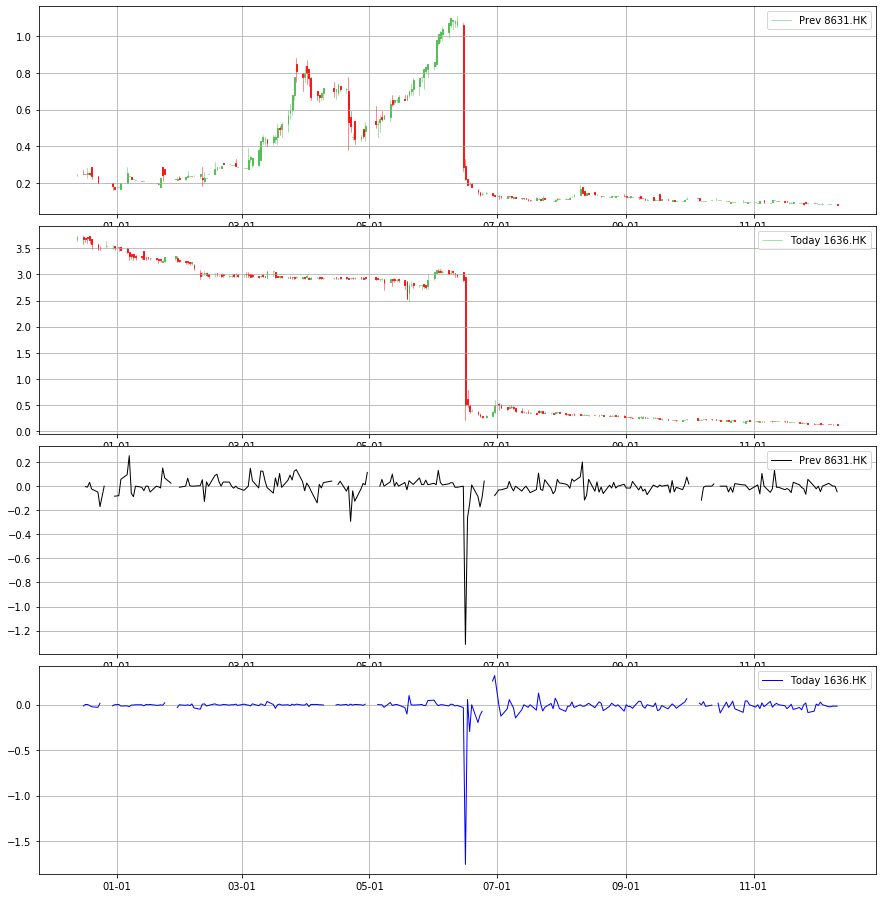

In [32]:
stock1 = '8631.HK.prev'
stock2 = '1636.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
tools.plot_two_stocks(stock1, stock2, prevday_returns, today_returns, start)

### Grapth the top correlation pair

In [ ]:
stock1 = '6898.HK.prev'
stock2 = '8612.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2, prevday_returns[stock1], today_returns[stock2])

### Upload to AWS S3

In [33]:
s3_bucket = 'slack-trading'
local_path = '../data'
tools.upload_data_to_s3(s3_bucket, local_path)